# TELE2. Location attractiveness assessing
## Data preprocessing and EDA

## Imports

In [1]:
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import ParameterGrid

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree

#from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import PredictionErrorDisplay

from sklearn.decomposition import PCA

#from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import datetime
import seaborn as sns
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.mosaicplot import mosaic
pd.set_option('display.max_columns', 70)

In [2]:
hex_data = pd.read_csv('C:/Users/elysi/Tele2_project/data/tracks_and_hex/spb_hex_v4.csv', sep = ',', decimal = ',', index_col = 0)
df_hex = pd.DataFrame(hex_data)
df_hex.shape

(50909, 33)

In [24]:
%%time
df_tracks = pd.read_csv('C:/Users/elysi/Tele2_project/data/tracks_and_hex/tracks_v4.csv', sep = ',', decimal = ',', index_col = 0)
df_tracks = df_tracks.iloc[:, 1:]

CPU times: total: 10.3 s
Wall time: 13.6 s


## `df_tracks` - Description and preprocessing

In [4]:
df_tracks.drop(['start_dttm_day', 'centroid_wkt'], axis = 1, inplace=True)
df_tracks.head(5)

,id,start_dttm,end_dttm,centroid_lon,centroid_lat,h3_9,age,car_owners,carsharing_user,not_citizen_rf,gender,healthy_food_inter,income,public_trnsprt_user,pharmacies_inter,beauty_salon_inter,elite_sports_inter,sprtswr_ftwr_inter,sprt_good_inter,trvl_rus,trvl_abrd,sprt_fit_inter,hunting_fishing_inter,fashion_inter,coffee_inter,med_serv_inter,education_inter,delivery_inter,markets_inter,no_children
0,687194767538,2023-03-11 01:38:35,2023-03-11 09:38:35,30.508818,59.975328,89110604d0fffff,48.0,0,0,0,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,687194767538,2023-03-10 23:38:35,2023-03-11 01:38:35,30.508818,59.975328,89110604d0fffff,48.0,0,0,0,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,687194767538,2023-03-11 15:57:02,2023-03-11 17:54:41,30.508818,59.975328,89110604d0fffff,48.0,0,0,0,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,687194767538,2023-03-11 13:57:02,2023-03-11 15:57:02,30.508818,59.975328,89110604d0fffff,48.0,0,0,0,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,687194767538,2023-03-11 20:56:27,2023-03-11 22:56:27,30.508818,59.975328,89110604d0fffff,48.0,0,0,0,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
df_tracks.dtypes

id                        int64
start_dttm               object
end_dttm                 object
centroid_lon             object
centroid_lat             object
h3_9                     object
age                      object
car_owners                int64
carsharing_user           int64
not_citizen_rf            int64
gender                    int64
healthy_food_inter        int64
income                   object
public_trnsprt_user       int64
pharmacies_inter          int64
beauty_salon_inter        int64
elite_sports_inter        int64
sprtswr_ftwr_inter        int64
sprt_good_inter           int64
trvl_rus                  int64
trvl_abrd                 int64
sprt_fit_inter            int64
hunting_fishing_inter     int64
fashion_inter             int64
coffee_inter              int64
med_serv_inter            int64
education_inter           int64
delivery_inter            int64
markets_inter             int64
no_children               int64
dtype: object

In [6]:
df_tracks['age'] = df_tracks['age'].astype(float)
df_tracks['income'] = df_tracks['income'].astype(float)

In [7]:
df_tracks.shape, df_tracks.h3_9.nunique()

((2716777, 30), 50909)

In [8]:
df_tracks.describe()

,id,age,car_owners,carsharing_user,not_citizen_rf,gender,healthy_food_inter,income,public_trnsprt_user,pharmacies_inter,beauty_salon_inter,elite_sports_inter,sprtswr_ftwr_inter,sprt_good_inter,trvl_rus,trvl_abrd,sprt_fit_inter,hunting_fishing_inter,fashion_inter,coffee_inter,med_serv_inter,education_inter,delivery_inter,markets_inter,no_children
count,2.716777e+06,2.619279e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.493919e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06,2.716777e+06
mean,3.845093e+11,4.407939e+01,4.923061e-01,1.827419e-01,5.296651e-01,4.732405e-01,2.927550e-02,2.512254e+00,4.567765e-02,5.670830e-01,4.122237e-02,1.070496e-02,9.401949e-03,1.239215e-01,1.263928e-01,1.952056e-02,2.972456e-02,2.775127e-02,1.095740e-01,1.110536e-01,2.388761e-01,3.091373e-01,3.235006e-01,5.120972e-01,7.259289e-01
std,2.234285e+11,1.368552e+01,4.999409e-01,3.864549e-01,4.991193e-01,4.992835e-01,1.685777e-01,1.399749e+00,2.087851e-01,4.954795e-01,1.988042e-01,1.029095e-01,9.650677e-02,3.294920e-01,3.322916e-01,1.383456e-01,1.698264e-01,1.642594e-01,3.123580e-01,3.141986e-01,4.263969e-01,4.621380e-01,4.678120e-01,4.998537e-01,4.460451e-01
min,0.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.889786e+11,3.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.865471e+11,4.200000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,5.755256e+11,5.300000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,7.730941e+11,9.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
##Такое нам не нужно

#df_tracks['age'].fillna(value=df_tracks['age'].mean(), inplace=True)
#df_tracks['income'].fillna(value=df_tracks['income'].mean(), inplace=True)

In [10]:
df_tracks.sort_values('start_dttm', inplace = False).head(5)

,id,start_dttm,end_dttm,centroid_lon,centroid_lat,h3_9,age,car_owners,carsharing_user,not_citizen_rf,gender,healthy_food_inter,income,public_trnsprt_user,pharmacies_inter,beauty_salon_inter,elite_sports_inter,sprtswr_ftwr_inter,sprt_good_inter,trvl_rus,trvl_abrd,sprt_fit_inter,hunting_fishing_inter,fashion_inter,coffee_inter,med_serv_inter,education_inter,delivery_inter,markets_inter,no_children
2437419,266287972661,2023-03-02 00:00:19,2023-03-03 13:00:19,30.36573,59.886258,891106070abffff,NaN,0,0,0,0,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
572788,128849019068,2023-03-02 00:14:18,2023-03-03 06:29:18,29.094942,59.907037,89113128583ffff,NaN,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1748677,446676599136,2023-03-02 00:26:33,2023-03-03 18:23:45,30.345415,59.934364,89110606013ffff,33.0,0,0,1,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
676450,343597384047,2023-03-02 00:30:28,2023-03-03 19:03:17,30.231151,59.938152,89110614ebbffff,67.0,0,0,0,0,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1897272,180388626547,2023-03-02 00:39:46,2023-03-03 18:05:15,27.557272,57.670278,891136680b3ffff,54.0,1,0,0,1,0,3.0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0


In [11]:
df_tracks.sort_values('start_dttm', inplace = False).tail(5)

,id,start_dttm,end_dttm,centroid_lon,centroid_lat,h3_9,age,car_owners,carsharing_user,not_citizen_rf,gender,healthy_food_inter,income,public_trnsprt_user,pharmacies_inter,beauty_salon_inter,elite_sports_inter,sprtswr_ftwr_inter,sprt_good_inter,trvl_rus,trvl_abrd,sprt_fit_inter,hunting_fishing_inter,fashion_inter,coffee_inter,med_serv_inter,education_inter,delivery_inter,markets_inter,no_children
2125735,704374636690,2023-03-20 22:59:15,2023-03-20 23:59:46,28.081431,59.109954,8911302232fffff,36.0,0,0,0,1,0,2.0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
1051692,627065225454,2023-03-20 22:59:31,2023-03-20 23:59:45,30.296972,59.914232,8911061590bffff,54.0,0,0,1,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2353074,498216206749,2023-03-20 22:59:40,2023-03-20 23:59:46,29.769796,59.998517,89110685583ffff,33.0,1,0,1,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2044561,386547056650,2023-03-20 22:59:42,2023-03-20 23:59:42,32.323942,59.923356,8911020428bffff,47.0,0,0,0,1,1,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
465077,360777253226,2023-03-20 22:59:49,2023-03-20 23:59:49,30.615682,59.743442,8911060d387ffff,36.0,0,1,1,1,0,1.0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0


In [12]:
#df_tracks.info()

In [13]:
# next we divide df_tracks into 2 datasets for visit duration and visitor's features for further preprocessing
# we will preprocess nulls in the separate dataset

## `df_dur` - For visit duration of hexes

*   id - identificator of a visitor
*   start_dttm - datetime mark for the start of a person's area occupation
*   end_dttm - datetime mark for the end of a person's area occupation
*   h3_9 - geo mark of a hexagon
*   centroid_lon - centroid's lontitude
*   centroid_lat - centroid's latitude

In [14]:
df_dur = df_tracks[['id', 'start_dttm', 'end_dttm', 'h3_9', 'centroid_lon', 'centroid_lat']]
df_dur.sort_values(['id', 'h3_9', 'start_dttm'], inplace = True)

In [15]:
df_dur.head(10)

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat
1015163,0,2023-03-19 13:34:29,2023-03-19 15:08:33,89110604c47ffff,30.491042,59.951082
1015112,0,2023-03-03 00:18:43,2023-03-03 02:16:28,891106a9817ffff,30.404122,60.031678
1015110,0,2023-03-03 02:16:28,2023-03-03 10:01:13,891106a9817ffff,30.404122,60.031678
1015113,0,2023-03-03 10:01:13,2023-03-03 11:44:19,891106a9817ffff,30.404122,60.031678
1015114,0,2023-03-03 13:17:33,2023-03-03 14:59:41,891106a9817ffff,30.404122,60.031678
1015111,0,2023-03-03 19:28:07,2023-03-03 21:57:15,891106a9817ffff,30.404122,60.031678
1015132,0,2023-03-03 23:39:50,2023-03-04 05:35:30,891106a9817ffff,30.404122,60.031678
1015133,0,2023-03-04 22:03:05,2023-03-04 23:03:31,891106a9817ffff,30.404122,60.031678
1015094,0,2023-03-05 00:14:05,2023-03-05 01:14:05,891106a9817ffff,30.404122,60.031678
1015095,0,2023-03-05 01:14:05,2023-03-05 03:14:05,891106a9817ffff,30.404122,60.031678


In [16]:
# convert data to datetime format
df_dur['start_dttm'] = pd.to_datetime(df_dur['start_dttm'], format='%Y-%m-%d %H:%M:%S')
df_dur['end_dttm'] = pd.to_datetime(df_dur['end_dttm'], format='%Y-%m-%d %H:%M:%S')

In [17]:
# check if end date is less than start date
k,z = df_dur[df_dur['end_dttm'] < df_dur['start_dttm']].shape
print("N of invalid cases of stay:", k, " out of ", len(df_dur))
print("Percentage of invalid cases:", round(k/len(df_dur) * 100,2), '%')

N of invalid cases of stay: 0  out of  2716777
Percentage of invalid cases: 0.0 %


In [18]:
# convert coordinates to float format
df_dur['centroid_lon'] = df_dur['centroid_lon'].apply(float)
df_dur['centroid_lat'] = df_dur['centroid_lat'].apply(float)

#### Reducing the coordinates of the same hex centroid to the same coordinates

In [19]:
df_dur.shape, df_dur.h3_9.nunique()

((2716777, 6), 50909)

In [20]:
# there are cases where coordinates of centroid are different for the same hex
check_coords = df_dur.groupby(['h3_9', 'centroid_lon', 'centroid_lat']).size().reset_index(name='counts')
check_coords

,h3_9,centroid_lon,centroid_lat,counts
0,89013404287ffff,31.212208,69.561184,2
1,89013440cd7ffff,32.442056,69.401861,69
2,89013452107ffff,32.267631,69.239883,3
3,89013458377ffff,32.810600,69.293200,4
4,89013458a7bffff,32.807694,69.323528,71
...,...,...,...,...
104152,89316e0c4b3ffff,130.994001,42.638093,1
104153,89316e316cfffff,131.183138,42.595104,2
104154,89316eab3d7ffff,131.254828,42.761784,1
104155,89316eba92bffff,131.406588,42.856008,1


In [21]:
print(f'BEFORE: There are {len(check_coords)} rows that have different coordinates for each h3_9 AS compared to {df_dur.h3_9.nunique()} unique h3_9')

BEFORE: There are 104157 rows that have different coordinates for each h3_9 AS compared to 50909 unique h3_9


In [22]:
check_coords.value_counts('h3_9')

h3_9
89110606467ffff    63
8911060295bffff    61
891106a8373ffff    58
8911060607bffff    55
891106a8027ffff    54
                   ..
89110629277ffff     1
89110629283ffff     1
89110629297ffff     1
891106292cfffff     1
89316ebaccbffff     1
Length: 50909, dtype: int64

In [23]:
# before
df_dur[df_dur.h3_9 == '89110606467ffff']

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat
2260476,55,2023-03-04 13:56:16,2023-03-04 15:25:19,89110606467ffff,30.326543,59.935212
2260514,55,2023-03-06 13:31:50,2023-03-06 15:36:55,89110606467ffff,30.326543,59.935212
2406551,69,2023-03-08 06:28:01,2023-03-08 08:44:24,89110606467ffff,30.328310,59.935041
1253158,116,2023-03-11 14:49:15,2023-03-11 18:49:20,89110606467ffff,30.326543,59.935212
1154531,179,2023-03-04 13:32:17,2023-03-04 15:04:08,89110606467ffff,30.328018,59.935472
...,...,...,...,...,...,...
575036,764504178951,2023-03-17 04:27:56,2023-03-17 05:27:56,89110606467ffff,30.328018,59.935472
232721,764504178955,2023-03-15 10:57:17,2023-03-15 14:15:11,89110606467ffff,30.328310,59.935041
232717,764504178955,2023-03-20 03:23:25,2023-03-20 10:51:11,89110606467ffff,30.328310,59.935041
1770159,764504179214,2023-03-06 18:07:47,2023-03-06 20:32:42,89110606467ffff,30.328310,59.935041


In [ ]:
# replace different coordinates for the same h3_9 with mean of centroid_lon and centroid_lat
new_coords = df_dur.groupby('h3_9').agg({'centroid_lon': 'mean', 'centroid_lat': 'mean'}).reset_index()
new_coords

,h3_9,centroid_lon,centroid_lat
0,89013404287ffff,31.212208,69.561184
1,89013440cd7ffff,32.442056,69.401861
2,89013452107ffff,32.267631,69.239883
3,89013458377ffff,32.810600,69.293200
4,89013458a7bffff,32.807694,69.323528
...,...,...,...
50904,89316e0c4b3ffff,130.994001,42.638093
50905,89316e316cfffff,131.183138,42.595104
50906,89316eab3d7ffff,131.254828,42.761784
50907,89316eba92bffff,131.406588,42.856008


In [ ]:
df_dur = df_dur.merge(new_coords, on='h3_9', how='left')
df_dur.rename(columns={'centroid_lon_x':'centroid_lon_old','centroid_lat_x':'centroid_lat_old', 'centroid_lon_y':'centroid_lon','centroid_lat_y':'centroid_lat'}, inplace=True)
df_dur.sort_values(['id', 'h3_9', 'start_dttm'], inplace = True)
df_dur

,id,start_dttm,end_dttm,h3_9,centroid_lon_old,centroid_lat_old,centroid_lon,centroid_lat
0,0,2023-03-19 13:34:29,2023-03-19 15:08:33,89110604c47ffff,30.491042,59.951082,30.489798,59.951067
1,0,2023-03-03 00:18:43,2023-03-03 02:16:28,891106a9817ffff,30.404122,60.031678,30.404148,60.031672
2,0,2023-03-03 02:16:28,2023-03-03 10:01:13,891106a9817ffff,30.404122,60.031678,30.404148,60.031672
3,0,2023-03-03 10:01:13,2023-03-03 11:44:19,891106a9817ffff,30.404122,60.031678,30.404148,60.031672
4,0,2023-03-03 13:17:33,2023-03-03 14:59:41,891106a9817ffff,30.404122,60.031678,30.404148,60.031672
...,...,...,...,...,...,...,...,...
2716772,773094113323,2023-03-19 18:29:54,2023-03-19 19:29:54,891106075a3ffff,30.346307,59.906929,30.346309,59.906931
2716773,773094113323,2023-03-19 19:29:54,2023-03-19 20:29:54,891106075a3ffff,30.346307,59.906929,30.346309,59.906931
2716774,773094113323,2023-03-19 20:29:54,2023-03-19 21:29:54,891106075a3ffff,30.346307,59.906929,30.346309,59.906931
2716775,773094113323,2023-03-19 21:29:54,2023-03-19 22:47:19,891106075a3ffff,30.346307,59.906929,30.346309,59.906931


In [ ]:
# drop old coordinates
df_dur.drop(['centroid_lon_old', 'centroid_lat_old'], inplace=True, axis=1)

In [ ]:
# after
df_dur[df_dur.h3_9 == '89110606467ffff']

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat
3620,55,2023-03-04 13:56:16,2023-03-04 15:25:19,89110606467ffff,30.32822,59.935431
3621,55,2023-03-06 13:31:50,2023-03-06 15:36:55,89110606467ffff,30.32822,59.935431
4193,69,2023-03-08 06:28:01,2023-03-08 08:44:24,89110606467ffff,30.32822,59.935431
7483,116,2023-03-11 14:49:15,2023-03-11 18:49:20,89110606467ffff,30.32822,59.935431
10970,179,2023-03-04 13:32:17,2023-03-04 15:04:08,89110606467ffff,30.32822,59.935431
...,...,...,...,...,...,...
2701286,764504178951,2023-03-17 04:27:56,2023-03-17 05:27:56,89110606467ffff,30.32822,59.935431
2701538,764504178955,2023-03-15 10:57:17,2023-03-15 14:15:11,89110606467ffff,30.32822,59.935431
2701539,764504178955,2023-03-20 03:23:25,2023-03-20 10:51:11,89110606467ffff,30.32822,59.935431
2713904,764504179214,2023-03-06 18:07:47,2023-03-06 20:32:42,89110606467ffff,30.32822,59.935431


In [ ]:
# check for NAs - no NAs
(df_dur.isna().sum() / len(df_dur)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

,percent of NA
id,0.00%
start_dttm,0.00%
end_dttm,0.00%
h3_9,0.00%
centroid_lon,0.00%
centroid_lat,0.00%


In [ ]:
check_coords = df_dur.groupby(['h3_9', 'centroid_lon', 'centroid_lat']).size().reset_index(name='counts')
print(f'AFTER: There are {len(check_coords)} rows that have different coordinates for each h3_9 AS compared to {df_dur.h3_9.nunique()} unique h3_9. The coordinates are the same now')

AFTER: There are 50909 rows that have different coordinates for each h3_9 AS compared to 50909 unique h3_9. The coordinates are the same now


#### Combining multiple observations for visitors with overlapping time `in the same hex`

In [ ]:
before = df_dur[df_dur.id == 1030792151215].head(10)
before
# the same start_dttm in one hex: 1345401 and 1345402
# the end_dttm of the previous = start_dttm of the next row: 1345403 and 1345404

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat


In [ ]:
df_new_dur = df_dur.copy()
columns_for_group = ['id',  'h3_9', 'end_dttm', 'centroid_lon', 'centroid_lat']

df_new_dur['same_time'] = ((df_new_dur['end_dttm'] >= df_new_dur['start_dttm'].shift(-1)) & \
                          (df_new_dur['id'] == df_new_dur['id'].shift(-1)) & \
                          (df_new_dur['h3_9'] == df_new_dur['h3_9'].shift(-1)) & \
                          (df_new_dur['centroid_lon'] == df_new_dur['centroid_lon'].shift(-1)) & \
                          (df_new_dur['centroid_lat'] == df_new_dur['centroid_lat'].shift(-1)))

In [ ]:
intersections = len(df_new_dur[df_new_dur['same_time'] == True])
print(f'Where are {intersections} observations with intersections in time of a visit at the same hex for each user')

Where are 704145 observations with intersections in time of a visit at the same hex for each user


In [ ]:
# takes long time, better load the next cell
while intersections != 0:
  df_new_dur['same_time'] = ((df_new_dur['end_dttm'] >= df_new_dur['start_dttm'].shift(-1)) & \
                        (df_new_dur['id'] == df_new_dur['id'].shift(-1)) & \
                        (df_new_dur['h3_9'] == df_new_dur['h3_9'].shift(-1)) & \
                        (df_new_dur['centroid_lon'] == df_new_dur['centroid_lon'].shift(-1)) & \
                        (df_new_dur['centroid_lat'] == df_new_dur['centroid_lat'].shift(-1)))

  intersections = len(df_new_dur[df_new_dur['same_time'] == True])
  #print(intersections)

  df_new_dur.loc[df_new_dur['same_time'], 'end_dttm'] = df_new_dur['end_dttm'].shift(-1)
  df_new_dur = df_new_dur.groupby(columns_for_group).agg({'start_dttm': 'first'}).reset_index()
  df_new_dur = df_new_dur[['id',  'start_dttm', 'end_dttm', 'h3_9', 'centroid_lon', 'centroid_lat']]
  df_new_dur.sort_values(['id', 'h3_9', 'start_dttm'], inplace = True)

In [ ]:
df_new_dur.to_csv('/gdrive/My Drive/GraduationThesis/Data/df_new_dur.csv')
# file for download is available here https://drive.google.com/file/d/1-OKdcBQvUbVfVf06wqGxvq7-q8x0IsA4/view?usp=drive_link

df_new_dur = pd.DataFrame(pd.read_csv('/gdrive/My Drive/GraduationThesis/Data/df_new_dur.csv', sep = ',', decimal = ',', index_col = 0))
df_dur['start_dttm'] = pd.to_datetime(df_dur['start_dttm'], format='%Y-%m-%d %H:%M:%S')
df_dur['end_dttm'] = pd.to_datetime(df_dur['end_dttm'], format='%Y-%m-%d %H:%M:%S')

df_new_dur['centroid_lon'] = df_new_dur['centroid_lon'].apply(float).round(6)
df_new_dur['centroid_lat'] = df_new_dur['centroid_lat'].apply(float).round(6)

# final excel with comparison for id 1030792151215 here
# https://docs.google.com/spreadsheets/d/1Uy714DU1Q4boLgA-UvRM1WxhJuP_bWwm/edit?usp=sharing&ouid=116315809499660973487&rtpof=true&sd=true

In [ ]:
before

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat


In [ ]:
after = df_new_dur[df_new_dur.id == 1030792151215].head(10)
after

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat


In [ ]:
print(f'We collapsed {len(df_dur) - len(df_new_dur)} observations for a visitor with intersecting time in the same hex OUT of {len(df_dur)}')

We collapsed 704145 observations for a visitor with intersecting time in the same hex OUT of 2716777


In [ ]:
df_new_dur.shape

(2012632, 6)

#### Adding time and distance traveled between different hexes

In [ ]:
df_new_dur = df_new_dur.sort_values(['id', 'start_dttm','h3_9'], inplace = False)
df_new_dur.head()

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat
1,0,2023-03-03 00:18:43,2023-03-03 11:44:19,891106a9817ffff,30.404148,60.031672
2,0,2023-03-03 13:17:33,2023-03-03 14:59:41,891106a9817ffff,30.404148,60.031672
3,0,2023-03-03 19:28:07,2023-03-03 21:57:15,891106a9817ffff,30.404148,60.031672
4,0,2023-03-03 23:39:50,2023-03-04 05:35:30,891106a9817ffff,30.404148,60.031672
89,0,2023-03-04 05:35:30,2023-03-04 08:35:30,891106a9d4bffff,30.397402,60.036731


In [ ]:
# Add distance between neighdour rows
lat1_rad = np.deg2rad(df_new_dur['centroid_lat'])
lon1_rad = np.deg2rad(df_new_dur['centroid_lon'])
lat2_rad = np.roll(lat1_rad, 1)
lon2_rad = np.roll(lon1_rad, 1)

dlon = lon2_rad - lon1_rad
dlat = lat2_rad - lat1_rad

a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) *np.cos(lat2_rad)* np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

R = 6371.0

df_new_dur['distance(km)'] = R * c
df_new_dur['distance(km)'] = df_new_dur['distance(km)'].round(3)

In [ ]:
# Add time between neighdour rows
df_new_dur['start_dttm'] = pd.to_datetime(df_new_dur['start_dttm'])
df_new_dur['end_dttm'] = pd.to_datetime(df_new_dur['end_dttm'])

df_new_dur['time_spent(sec)'] = (df_new_dur['start_dttm'] - df_new_dur['end_dttm'].shift(1)).dt.total_seconds()

#### Combining multiple observations for visitors with overlapping time `in different hexes`

In [ ]:
# We can see rows where end_dttm of the previous = start_dttm of the next, yet the person is located `in different hexes`
# for example rows 21,28, and 2,20
df_new_dur1  = df_new_dur.copy()
df_new_dur1.head()

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec)
1,0,2023-03-03 00:18:43,2023-03-03 11:44:19,891106a9817ffff,30.404148,60.031672,14.239,NaN
2,0,2023-03-03 13:17:33,2023-03-03 14:59:41,891106a9817ffff,30.404148,60.031672,0.000,5594.0
3,0,2023-03-03 19:28:07,2023-03-03 21:57:15,891106a9817ffff,30.404148,60.031672,0.000,16106.0
4,0,2023-03-03 23:39:50,2023-03-04 05:35:30,891106a9817ffff,30.404148,60.031672,0.000,6155.0
89,0,2023-03-04 05:35:30,2023-03-04 08:35:30,891106a9d4bffff,30.397402,60.036731,0.676,0.0


In [ ]:
df_new_dur1['overlapping'] = ((df_new_dur1['end_dttm'] > df_new_dur1['start_dttm'].shift(-1)) & \
                      (df_new_dur1['id'] == df_new_dur1['id'].shift(-1)) & \
                      (df_new_dur1['h3_9'] != df_new_dur1['h3_9'].shift(-1)) & \
                      (df_new_dur1['centroid_lon'] != df_new_dur1['centroid_lon'].shift(-1)) & \
                      (df_new_dur1['centroid_lat'] != df_new_dur1['centroid_lat'].shift(-1)))

In [ ]:
df_new_dur1[df_new_dur1['overlapping'] == True].head()

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),overlapping
1759,34,2023-03-08 13:44:11,2023-03-08 15:22:41,8911332ae23ffff,30.007902,59.050490,1.741,0.0,True
32587,8589934818,2023-03-07 18:26:36,2023-03-07 21:09:35,89110610b27ffff,30.173399,59.830397,0.296,793.0,True
46969,17179869230,2023-03-19 09:49:12,2023-03-19 12:17:33,891106af28bffff,30.383783,60.120558,1.921,0.0,True
51531,17179869330,2023-03-18 17:50:31,2023-03-18 19:14:32,8911048ac9bffff,28.775233,60.698441,2.039,6464.0,True
55396,17179869411,2023-03-07 20:10:09,2023-03-08 03:49:54,892d568daabffff,39.893965,43.478304,0.533,3367.0,True


In [ ]:
df_new_dur1[df_new_dur1['id'] == 34359738457] # look for 38098 - neighbours are 38097 and 38109

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),overlapping
91983,34359738457,2023-03-02 22:57:30,2023-03-03 18:37:33,891106b120fffff,29.960647,60.093447,31.953,-1520580.0,False
91987,34359738457,2023-03-03 18:37:33,2023-03-04 14:51:02,891106b121bffff,29.950423,60.090604,0.649,0.0,False
91969,34359738457,2023-03-04 15:06:25,2023-03-04 17:16:22,8911060604fffff,30.358940,59.927573,29.055,923.0,False
91971,34359738457,2023-03-04 18:45:25,2023-03-04 20:29:47,891106a9803ffff,30.409196,60.029952,11.722,5343.0,False
91972,34359738457,2023-03-04 21:31:35,2023-03-04 23:04:25,891106a9803ffff,30.409196,60.029952,0.000,3708.0,False
91973,34359738457,2023-03-04 23:43:50,2023-03-05 01:21:25,891106a9803ffff,30.409196,60.029952,0.000,2365.0,False
91996,34359738457,2023-03-05 02:20:54,2023-03-05 07:33:05,891106b122fffff,29.970832,60.096739,25.434,3569.0,False
91988,34359738457,2023-03-05 07:33:05,2023-03-05 14:08:33,891106b121bffff,29.950423,60.090604,1.321,0.0,False
92003,34359738457,2023-03-05 14:58:19,2023-03-05 17:05:32,891106b1343ffff,29.974838,60.104004,2.013,2986.0,False
91974,34359738457,2023-03-05 19:28:55,2023-03-05 20:57:43,891106ab683ffff,30.205136,59.991045,17.923,8603.0,False


In [ ]:
df_new_dur1.loc[[38097,38098,38109]]
#df_new_dur1.loc[[258034,258039,258035]]

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),overlapping
38097,8589934929,2023-03-19 20:14:41,2023-03-19 21:19:26,891118d1833ffff,35.226450,59.514850,271.276,26468.0,False
38098,8589934931,2023-03-02 19:52:55,2023-03-03 04:36:55,89118324e73ffff,39.274861,54.385417,745.102,-1567943.0,False
38109,8589934932,2023-03-05 02:37:46,2023-03-05 07:14:01,8911048031bffff,28.751542,60.767711,5.798,0.0,False


In [ ]:
overlapping = len(df_new_dur1[df_new_dur1['overlapping'] == True])
print(f'Where are {overlapping} observations with intersections in time of a visit at different hexes for each user OUT OF {len(df_new_dur1)}')

Where are 25 observations with intersections in time of a visit at different hexes for each user OUT OF 2012632


In [ ]:
df_new_dur1['overlapping_1km'] = ((df_new_dur1['end_dttm'] > df_new_dur1['start_dttm'].shift(-1)) & \
                      (df_new_dur1['id'] == df_new_dur1['id'].shift(-1)) & \
                      (df_new_dur1['h3_9'] != df_new_dur1['h3_9'].shift(-1)) & \
                      (df_new_dur1['centroid_lon'] != df_new_dur1['centroid_lon'].shift(-1)) & \
                      (df_new_dur1['centroid_lat'] != df_new_dur1['centroid_lat'].shift(-1)) & \
                      (df_new_dur1['distance(km)'].shift(-1) > 1))

In [ ]:
df_new_dur1[df_new_dur1['overlapping_1km'] == True].head()

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),overlapping,overlapping_1km
1759,34,2023-03-08 13:44:11,2023-03-08 15:22:41,8911332ae23ffff,30.007902,59.050490,1.741,0.0,True,True
46969,17179869230,2023-03-19 09:49:12,2023-03-19 12:17:33,891106af28bffff,30.383783,60.120558,1.921,0.0,True,True
411791,154618822907,2023-03-17 03:26:15,2023-03-17 10:32:40,89110628ecbffff,31.024918,59.938958,0.000,2049.0,True,True
428350,163208757405,2023-03-17 21:47:16,2023-03-17 23:17:16,891181b044bffff,37.516390,55.429720,1.282,53117.0,True,True
1019977,386547057143,2023-03-17 22:32:21,2023-03-17 23:32:24,891181c45cfffff,37.422696,54.918598,1.161,6567.0,True,True


In [ ]:
df_new_dur1[df_new_dur1['id'] == 1030792151215] # look for 1000346 - neighbours are 1000331 and 1000332
# look for 1000352 - neighbours are 1000343 and 1000344

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),overlapping,overlapping_1km


In [ ]:
#df_new_dur1.loc[[1000331,1000346,1000332]]
df_new_dur1.loc[[1000343,1000352,1000344]]

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),overlapping,overlapping_1km
1000343,386547056695,2023-03-09 07:59:19,2023-03-09 09:08:36,891106064c3ffff,30.301644,59.929828,0.821,10781.0,False,False
1000352,386547056695,2023-03-03 09:02:27,2023-03-03 10:47:49,891106064cfffff,30.305765,59.929650,1.051,11909.0,False,False
1000344,386547056695,2023-03-09 17:57:43,2023-03-09 19:00:06,891106064c3ffff,30.301644,59.929828,0.230,2516.0,False,False


In [ ]:
overlapping_1km = len(df_new_dur1[df_new_dur1['overlapping_1km'] == True])
print(f'Where are {overlapping_1km} observations with intersections in time of a visit at different hexes (1 km distance) for each user OUT OF {len(df_new_dur1)}')

Where are 8 observations with intersections in time of a visit at different hexes (1 km distance) for each user OUT OF 2012632


#### Combining multiple observations for visitors with the same start and end time `in different hexes`

In [ ]:
df_new_dur1['same'] = ((df_new_dur1['end_dttm'] == df_new_dur1['start_dttm'].shift(-1)) & \
                      (df_new_dur1['id'] == df_new_dur1['id'].shift(-1)) & \
                      (df_new_dur1['h3_9'] != df_new_dur1['h3_9'].shift(-1)) & \
                      (df_new_dur1['centroid_lon'] != df_new_dur1['centroid_lon'].shift(-1)) & \
                      (df_new_dur1['centroid_lat'] != df_new_dur1['centroid_lat'].shift(-1)))

In [ ]:
df_new_dur1[df_new_dur1['same'] == True].head()

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),overlapping,overlapping_1km,same
4,0,2023-03-03 23:39:50,2023-03-04 05:35:30,891106a9817ffff,30.404148,60.031672,0.000,6155.0,False,False,True
8,0,2023-03-05 23:15:52,2023-03-06 10:35:11,891106a9817ffff,30.404148,60.031672,0.000,6204.0,False,False,True
18,0,2023-03-07 23:44:31,2023-03-08 06:44:11,891106a9817ffff,30.404148,60.031672,0.000,844.0,False,False,True
91,0,2023-03-08 06:44:11,2023-03-08 07:44:11,891106a9d4bffff,30.397402,60.036731,0.676,0.0,False,False,True
32,0,2023-03-11 20:56:03,2023-03-12 01:10:36,891106a9817ffff,30.404148,60.031672,0.000,6652.0,False,False,True


In [ ]:
df_new_dur1[df_new_dur1['id'] == 0] # look for 1, 21, 28, 2, 20

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),overlapping,overlapping_1km,same
1,0,2023-03-03 00:18:43,2023-03-03 11:44:19,891106a9817ffff,30.404148,60.031672,14.239,NaN,False,False,False
2,0,2023-03-03 13:17:33,2023-03-03 14:59:41,891106a9817ffff,30.404148,60.031672,0.000,5594.0,False,False,False
3,0,2023-03-03 19:28:07,2023-03-03 21:57:15,891106a9817ffff,30.404148,60.031672,0.000,16106.0,False,False,False
4,0,2023-03-03 23:39:50,2023-03-04 05:35:30,891106a9817ffff,30.404148,60.031672,0.000,6155.0,False,False,True
89,0,2023-03-04 05:35:30,2023-03-04 08:35:30,891106a9d4bffff,30.397402,60.036731,0.676,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
101,0,2023-03-20 06:27:23,2023-03-20 07:27:23,891106a9d4bffff,30.397402,60.036731,0.676,0.0,False,False,True
61,0,2023-03-20 07:27:23,2023-03-20 08:37:21,891106a9817ffff,30.404148,60.031672,0.676,0.0,False,False,False
85,0,2023-03-20 09:11:14,2023-03-20 12:40:59,891106a987bffff,30.419320,60.024669,1.147,2033.0,False,False,False
86,0,2023-03-20 13:56:44,2023-03-20 16:01:33,891106a987bffff,30.419320,60.024669,0.000,4545.0,False,False,False


In [ ]:
df_new_dur1.loc[[1,21,28,2,20]]

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),overlapping,overlapping_1km,same
1,0,2023-03-03 00:18:43,2023-03-03 11:44:19,891106a9817ffff,30.404148,60.031672,14.239,NaN,False,False,False
21,0,2023-03-09 18:26:30,2023-03-09 20:27:19,891106a9817ffff,30.404148,60.031672,1.147,7766.0,False,False,False
28,0,2023-03-11 09:38:40,2023-03-11 10:58:18,891106a9817ffff,30.404148,60.031672,0.000,8450.0,False,False,False
2,0,2023-03-03 13:17:33,2023-03-03 14:59:41,891106a9817ffff,30.404148,60.031672,0.000,5594.0,False,False,False
20,0,2023-03-09 00:48:52,2023-03-09 07:32:53,891106a9817ffff,30.404148,60.031672,1.147,25245.0,False,False,False


In [ ]:
same = len(df_new_dur1[df_new_dur1['same'] == True])
print(f'Where are {same} observations with the same start and end time of a visit at different hexes for each user OUT OF {len(df_new_dur1)}')

Where are 476902 observations with the same start and end time of a visit at different hexes for each user OUT OF 2012632


In [ ]:
df_new_dur1['same_1km'] = ((df_new_dur1['end_dttm'] == df_new_dur1['start_dttm'].shift(-1)) & \
                      (df_new_dur1['id'] == df_new_dur1['id'].shift(-1)) & \
                      (df_new_dur1['h3_9'] != df_new_dur1['h3_9'].shift(-1)) & \
                      (df_new_dur1['centroid_lon'] != df_new_dur1['centroid_lon'].shift(-1)) & \
                      (df_new_dur1['centroid_lat'] != df_new_dur1['centroid_lat'].shift(-1)) & \
                      (df_new_dur1['distance(km)'].shift(-1) > 1))

In [ ]:
df_new_dur1[df_new_dur1['same_1km'] == True].head()

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),overlapping,overlapping_1km,same,same_1km
102,1,2023-03-02 21:50:29,2023-03-04 12:34:14,89110611047ffff,30.071283,59.722012,38.857,-1544058.0,False,False,True,True
111,1,2023-03-04 12:34:14,2023-03-04 16:36:44,891106c4977ffff,30.017781,59.706751,3.447,0.0,False,False,True,True
103,1,2023-03-04 16:36:44,2023-03-05 15:54:13,89110611047ffff,30.071283,59.722012,3.447,0.0,False,False,True,True
112,1,2023-03-05 15:54:13,2023-03-06 11:54:16,891106c4977ffff,30.017781,59.706751,3.447,0.0,False,False,True,True
105,1,2023-03-07 12:20:38,2023-03-08 08:22:41,89110611047ffff,30.071283,59.722012,0.000,6208.0,False,False,True,True


In [ ]:
df_new_dur1[df_new_dur1['id'] == 2] # look for 69,70,63,71

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),overlapping,overlapping_1km,same,same_1km
128,2,2023-03-03 00:02:58,2023-03-03 14:53:12,89110678363ffff,30.881982,59.537556,52.109,-1544282.0,False,False,True,False
125,2,2023-03-03 14:53:12,2023-03-03 16:43:51,8911067832bffff,30.878180,59.541438,0.482,0.0,False,False,False,False
129,2,2023-03-03 23:48:26,2023-03-04 08:46:54,89110678363ffff,30.881982,59.537556,0.482,25475.0,False,False,True,True
120,2,2023-03-04 08:46:54,2023-03-04 09:46:54,89110678317ffff,30.864700,59.541116,1.052,0.0,False,False,False,False
130,2,2023-03-04 20:08:11,2023-03-05 08:40:34,89110678363ffff,30.881982,59.537556,1.052,37277.0,False,False,False,False
131,2,2023-03-05 20:58:07,2023-03-06 15:00:59,89110678363ffff,30.881982,59.537556,0.000,44253.0,False,False,False,False
132,2,2023-03-06 17:39:23,2023-03-07 13:38:52,89110678363ffff,30.881982,59.537556,0.000,9504.0,False,False,False,False
155,2,2023-03-07 15:57:19,2023-03-07 17:55:48,891106783dbffff,30.854833,59.530833,1.703,8307.0,False,False,False,False
133,2,2023-03-07 18:20:38,2023-03-07 22:23:44,89110678363ffff,30.881982,59.537556,1.703,1490.0,False,False,False,False
134,2,2023-03-07 22:53:44,2023-03-08 08:23:57,89110678363ffff,30.881982,59.537556,0.000,1800.0,False,False,False,False


In [ ]:
df_new_dur1.loc[[69,70,63,71]]

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),overlapping,overlapping_1km,same,same_1km
69,0,2023-03-05 16:59:46,2023-03-05 19:17:59,891106a987bffff,30.419320,60.024669,0.000,6021.0,False,False,False,False
70,0,2023-03-08 09:47:16,2023-03-08 10:51:36,891106a987bffff,30.419320,60.024669,1.147,1363.0,False,False,False,False
63,0,2023-03-12 09:22:17,2023-03-12 10:25:08,891106a9873ffff,30.418035,60.026801,0.943,0.0,False,False,False,False
71,0,2023-03-08 11:14:05,2023-03-08 13:47:58,891106a987bffff,30.419320,60.024669,0.000,1349.0,False,False,False,False


In [ ]:
same_1km = len(df_new_dur1[df_new_dur1['same_1km'] == True])
print(f'Where are {same_1km} observations with the same start and end time of a visit at different hexes (1 km distance) for each user OUT OF {len(df_new_dur1)}')

Where are 198577 observations with the same start and end time of a visit at different hexes (1 km distance) for each user OUT OF 2012632


In [ ]:
# что делать?

In [ ]:
# убрать лишние столбцы и убрать копирование для df_new_dur1

In [ ]:
df_new_dur

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec)
1,0,2023-03-03 00:18:43,2023-03-03 11:44:19,891106a9817ffff,30.404148,60.031672,14.239,NaN
2,0,2023-03-03 13:17:33,2023-03-03 14:59:41,891106a9817ffff,30.404148,60.031672,0.000,5594.0
3,0,2023-03-03 19:28:07,2023-03-03 21:57:15,891106a9817ffff,30.404148,60.031672,0.000,16106.0
4,0,2023-03-03 23:39:50,2023-03-04 05:35:30,891106a9817ffff,30.404148,60.031672,0.000,6155.0
89,0,2023-03-04 05:35:30,2023-03-04 08:35:30,891106a9d4bffff,30.397402,60.036731,0.676,0.0
...,...,...,...,...,...,...,...,...
2012628,773094113323,2023-03-19 10:54:46,2023-03-19 13:29:38,891106075a3ffff,30.346309,59.906931,3.046,2923.0
2012629,773094113323,2023-03-19 14:21:14,2023-03-19 16:59:35,891106075a3ffff,30.346309,59.906931,0.000,3096.0
2012630,773094113323,2023-03-19 17:29:54,2023-03-19 22:47:19,891106075a3ffff,30.346309,59.906931,0.000,1819.0
2012610,773094113323,2023-03-19 23:47:29,2023-03-20 10:18:15,89110606447ffff,30.316905,59.930025,3.046,3610.0


In [ ]:
# что делать?

In [ ]:
df_new_dur['same_time_within_1km'] = ((df_new_dur['end_dttm'] >= df_new_dur['start_dttm'].shift(-1)) & \
                      (df_new_dur['id'] == df_new_dur['id'].shift(-1)) & \
                      (df_new_dur['h3_9'] != df_new_dur['h3_9'].shift(-1)) & \
                      (df_new_dur['centroid_lon'] != df_new_dur['centroid_lon'].shift(-1)) & \
                      (df_new_dur['centroid_lat'] != df_new_dur['centroid_lat'].shift(-1)) & \
                      (df_new_dur['distance(km)'] > 1))

In [ ]:
intersections_1km = len(df_new_dur[df_new_dur['same_time_within_1km'] == True])
print(f'Where are {intersections_1km} observations with intersections in time of a visit in different hexes with the distance more than 1 km for each user OUT OF {len(df_new_dur)}')

Where are 213773 observations with intersections in time of a visit in different hexes with the distance more than 1 km for each user OUT OF 2012632


In [ ]:
df_new_dur

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),same_time_within_1km
1,0,2023-03-03 00:18:43,2023-03-03 11:44:19,891106a9817ffff,30.404148,60.031672,14.239,NaN,False
2,0,2023-03-03 13:17:33,2023-03-03 14:59:41,891106a9817ffff,30.404148,60.031672,0.000,5594.0,False
3,0,2023-03-03 19:28:07,2023-03-03 21:57:15,891106a9817ffff,30.404148,60.031672,0.000,16106.0,False
4,0,2023-03-03 23:39:50,2023-03-04 05:35:30,891106a9817ffff,30.404148,60.031672,0.000,6155.0,False
89,0,2023-03-04 05:35:30,2023-03-04 08:35:30,891106a9d4bffff,30.397402,60.036731,0.676,0.0,False
...,...,...,...,...,...,...,...,...,...
2012628,773094113323,2023-03-19 10:54:46,2023-03-19 13:29:38,891106075a3ffff,30.346309,59.906931,3.046,2923.0,False
2012629,773094113323,2023-03-19 14:21:14,2023-03-19 16:59:35,891106075a3ffff,30.346309,59.906931,0.000,3096.0,False
2012630,773094113323,2023-03-19 17:29:54,2023-03-19 22:47:19,891106075a3ffff,30.346309,59.906931,0.000,1819.0,False
2012610,773094113323,2023-03-19 23:47:29,2023-03-20 10:18:15,89110606447ffff,30.316905,59.930025,3.046,3610.0,False


In [ ]:
# where is no negative duration which is ok
df_new_dur.describe()

,id,centroid_lon,centroid_lat,distance(km),time_spent(sec)
count,2.012632e+06,2.012632e+06,2.012632e+06,2.012632e+06,2.012631e+06
mean,3.846485e+11,3.182776e+01,5.944898e+01,1.323994e+01,-2.232680e+04
std,2.233705e+11,8.303328e+00,2.128441e+00,1.318568e+02,2.118877e+05
min,0.000000e+00,1.988562e+01,4.156777e+01,0.000000e+00,-1.634559e+06
25%,1.889786e+11,3.023652e+01,5.977833e+01,0.000000e+00,0.000000e+00
50%,3.865471e+11,3.036594e+01,5.989975e+01,5.640000e-01,2.544000e+03
75%,5.755256e+11,3.049134e+01,5.999682e+01,3.153000e+00,7.406000e+03
max,7.730941e+11,1.608450e+02,7.126758e+01,7.403202e+03,1.413421e+06


In [ ]:
# convert data format of df_new_dur and extract duration, days, time and minutes
df_new_dur['duration'] = df_new_dur.end_dttm - df_new_dur.start_dttm
df_new_dur['days'] = df_new_dur['duration'].dt.days
df_new_dur['time'] = pd.to_timedelta(df_new_dur['duration']).dt.components['hours'].astype(str) + ':' + \
             pd.to_timedelta(df_new_dur['duration']).dt.components['minutes'].astype(str) + ':' + \
             pd.to_timedelta(df_new_dur['duration']).dt.components['seconds'].astype(str)
df_new_dur['hours'] =  pd.to_timedelta(df_new_dur['duration']).dt.components['hours'].astype(int)
df_new_dur['minutes'] =  pd.to_timedelta(df_new_dur['duration']).dt.components['minutes'].astype(int)
df_new_dur['seconds'] =  pd.to_timedelta(df_new_dur['duration']).dt.components['seconds'].astype(int)
df_new_dur['total_sec'] = df_new_dur.days*86400+df_new_dur.hours*3600 + df_new_dur.minutes*60+ df_new_dur.seconds

In [ ]:
df_new_dur

,id,start_dttm,end_dttm,h3_9,centroid_lon,centroid_lat,distance(km),time_spent(sec),same_time_within_1km,duration,days,time,hours,minutes,seconds,total_sec
1,0,2023-03-03 00:18:43,2023-03-03 11:44:19,891106a9817ffff,30.404148,60.031672,14.239,NaN,False,0 days 11:25:36,0,11:25:36,11,25,36,41136
2,0,2023-03-03 13:17:33,2023-03-03 14:59:41,891106a9817ffff,30.404148,60.031672,0.000,5594.0,False,0 days 01:42:08,0,1:42:8,1,42,8,6128
3,0,2023-03-03 19:28:07,2023-03-03 21:57:15,891106a9817ffff,30.404148,60.031672,0.000,16106.0,False,0 days 02:29:08,0,2:29:8,2,29,8,8948
4,0,2023-03-03 23:39:50,2023-03-04 05:35:30,891106a9817ffff,30.404148,60.031672,0.000,6155.0,False,0 days 05:55:40,0,5:55:40,5,55,40,21340
89,0,2023-03-04 05:35:30,2023-03-04 08:35:30,891106a9d4bffff,30.397402,60.036731,0.676,0.0,False,0 days 03:00:00,0,3:0:0,3,0,0,10800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012628,773094113323,2023-03-19 10:54:46,2023-03-19 13:29:38,891106075a3ffff,30.346309,59.906931,3.046,2923.0,False,0 days 02:34:52,0,2:34:52,2,34,52,9292
2012629,773094113323,2023-03-19 14:21:14,2023-03-19 16:59:35,891106075a3ffff,30.346309,59.906931,0.000,3096.0,False,0 days 02:38:21,0,2:38:21,2,38,21,9501
2012630,773094113323,2023-03-19 17:29:54,2023-03-19 22:47:19,891106075a3ffff,30.346309,59.906931,0.000,1819.0,False,0 days 05:17:25,0,5:17:25,5,17,25,19045
2012610,773094113323,2023-03-19 23:47:29,2023-03-20 10:18:15,89110606447ffff,30.316905,59.930025,3.046,3610.0,False,0 days 10:30:46,0,10:30:46,10,30,46,37846


In [ ]:
df_new_dur.columns

Index(['id', 'start_dttm', 'end_dttm', 'h3_9', 'centroid_lon', 'centroid_lat',
       'distance(km)', 'time_spent(sec)', 'same_time_within_1km', 'duration',
       'days', 'time', 'hours', 'minutes', 'seconds', 'total_sec'],
      dtype='object')

In [ ]:
df_new_dur = df_new_dur[['id', 'start_dttm', 'end_dttm', 'h3_9', 'centroid_lon', 'centroid_lat', 'duration', 'days', 'time', 'hours', 'minutes', 'seconds', 'total_sec']]

In [ ]:
df_new_dur.h3_9.nunique()

50909

In [ ]:
df_new_dur.to_csv('/gdrive/My Drive/GraduationThesis/Data/new_dur.csv')

## `df_dur` - Vizualization

In [ ]:
#check for visits for start_dates and end_dates
df_new_dur['start_date'] = df_new_dur['start_dttm'].dt.date
df_new_dur['end_date'] = df_new_dur['end_dttm'].dt.date
df_new_dur['start_time'] = df_new_dur['start_dttm'].dt.time
df_new_dur['end_time'] = df_new_dur['end_dttm'].dt.time

df_new_dur_ordered = df_new_dur[['start_dttm','end_dttm', 'start_date', 'end_date']]
ordered_start = df_new_dur_ordered['start_date'].value_counts()
ordered_end = df_new_dur_ordered['end_date'].value_counts()
#print(ordered_end, ordered_start)

# check the most popular dates of start and end of hexes' visit
df_ordered_start = pd.DataFrame(ordered_start).sort_index()
df_ordered_end = pd.DataFrame(ordered_end).sort_index()
new = df_ordered_start.join(df_ordered_end)
#new

<ipython-input-107-c3a3762ba888>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_dur['start_date'] = df_new_dur['start_dttm'].dt.date
<ipython-input-107-c3a3762ba888>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_dur['end_date'] = df_new_dur['end_dttm'].dt.date


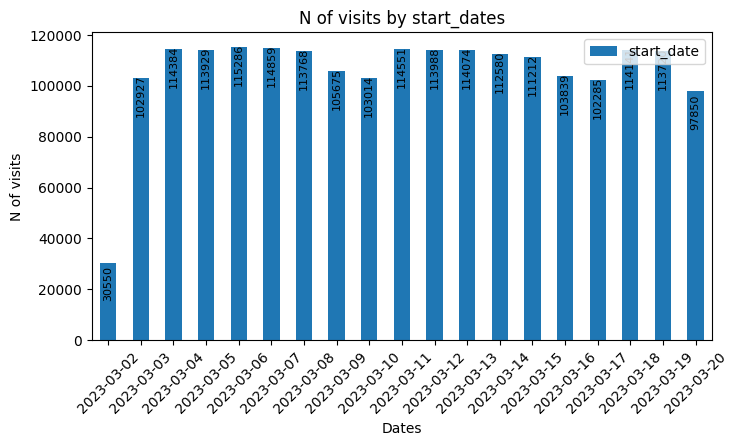

In [ ]:
# Distribution of N of visits by start_dates
ax = df_ordered_start.plot(kind="bar", figsize=(8,4))
plt.xlabel("Dates")
plt.ylabel("N of visits")
plt.title("N of visits by start_dates")

for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='black', rotation=90, fontsize=8, padding=-28)

plt.xticks(rotation=45)
plt.show()

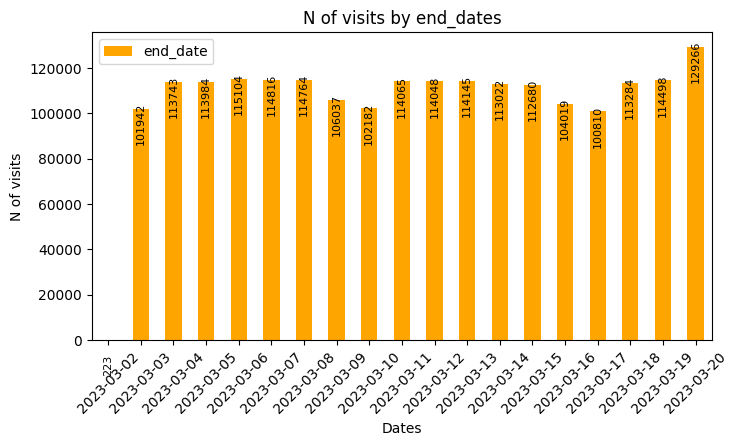

In [ ]:
# Distribution of N of visits by end_dates
ax = df_ordered_end.plot(kind="bar", figsize=(8,4), color = 'orange')
plt.xlabel("Dates")
plt.ylabel("N of visits")
plt.title("N of visits by end_dates")

for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='black', rotation=90, fontsize=8, padding=-26)

plt.xticks(rotation=45)
plt.show()

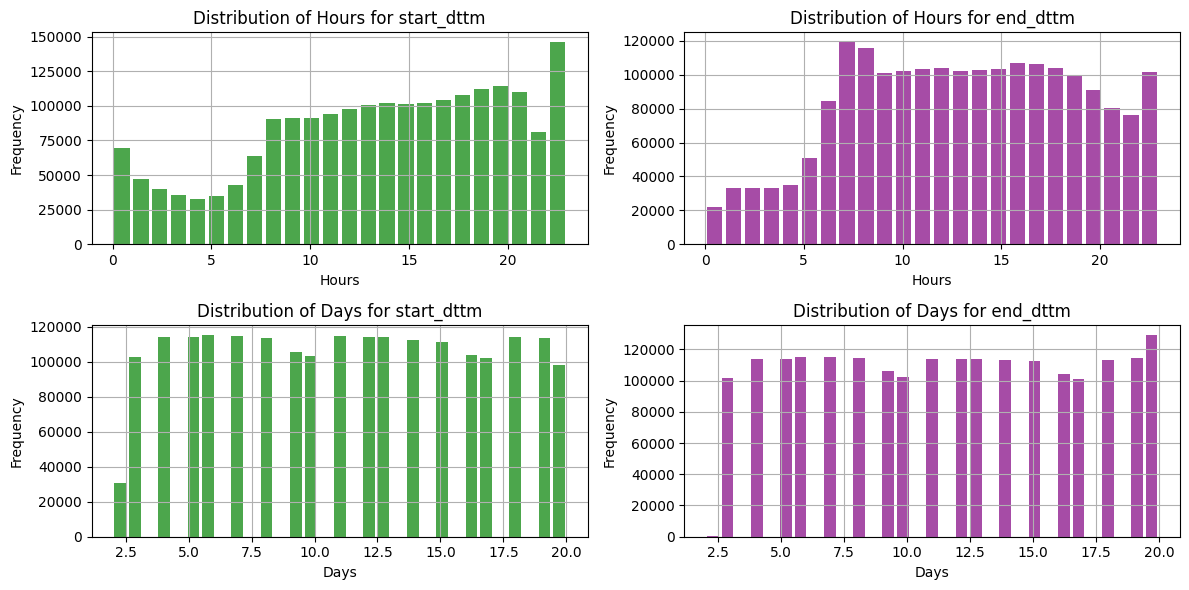

In [ ]:
# Distribution of duration of a stay
df_new_dur['start_dttm_hour'] = df_new_dur['start_dttm'].dt.hour
df_new_dur['end_dttm_hour'] = df_new_dur['end_dttm'].dt.hour

df_new_dur['start_dttm_day'] = df_new_dur['start_dttm'].dt.day
df_new_dur['end_dttm_day'] = df_new_dur['end_dttm'].dt.day

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
df_new_dur['start_dttm_hour'].hist(bins=24, rwidth=0.8, color='green', alpha=0.7)
plt.title('Distribution of Hours for start_dttm')
plt.xlabel('Hours')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
df_new_dur['end_dttm_hour'].hist(bins=24, rwidth=0.8, color='purple', alpha=0.7)
plt.title('Distribution of Hours for end_dttm')
plt.xlabel('Hours')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
df_new_dur['start_dttm_day'].hist(bins=31, rwidth=0.8, color='green', alpha=0.7)
plt.title('Distribution of Days for start_dttm')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
df_new_dur['end_dttm_day'].hist(bins=31, rwidth=0.8, color='purple', alpha=0.7)
plt.title('Distribution of Days for end_dttm')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

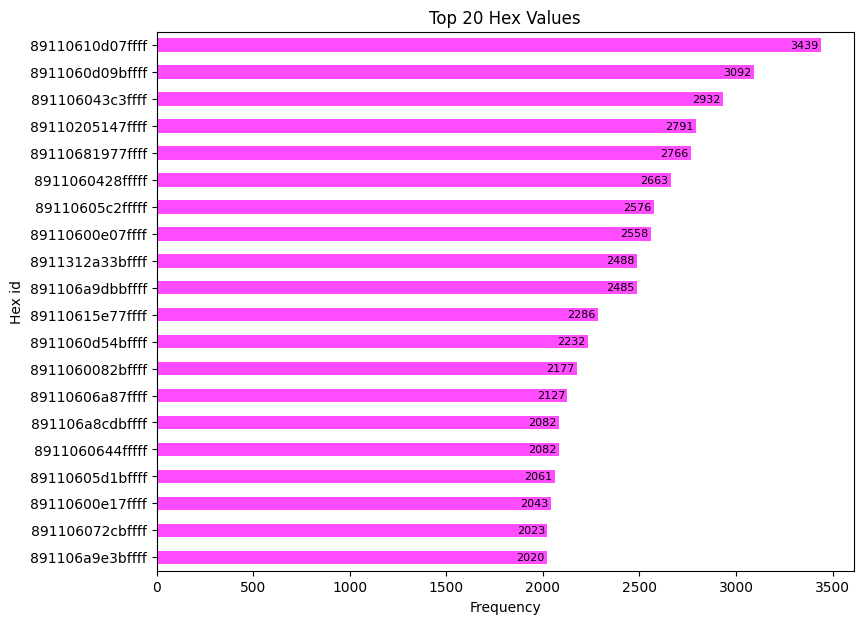

In [ ]:
# Most popular hexes
h3_9_counts = df_new_dur['h3_9'].value_counts()
top_20_h3_9 = h3_9_counts.head(20)

plt.figure(figsize=(9, 7))
ax = top_20_h3_9.sort_values().plot(kind='barh', color='magenta', alpha=0.7)
plt.title('Top 20 Hex Values')
plt.xlabel('Frequency')
plt.ylabel('Hex id')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='black', rotation=0, fontsize=8, padding=-22)

plt.show()

## `df_features` - For visitor's features
*   id - identifier of a visitor
*   h3_9 - geo mark of a hexagon
*   age - age of a visitor
*   car_owners - binary feature for a user to have a car
*   carsharing_user - binary feature for a user to ride a carsharing car
*   not_citizen_rf - binary feature for a user to be a Russian citizen
*   gender - gender of a user
*   healthy_food_inter - binary feature for a user to eat healthy food
*   income - N of people by salary levels (from low to very high)
*   public_trnsprt_user - binary feature for a user to use public transport

In [ ]:
df_features = df_tracks[['id', 'h3_9', 'age', 'gender', 'income', 'car_owners', 'carsharing_user', 'not_citizen_rf', 'healthy_food_inter', 'public_trnsprt_user']].sort_values('id')
df_features.head()

,id,h3_9,age,gender,income,car_owners,carsharing_user,not_citizen_rf,healthy_food_inter,public_trnsprt_user
1544264,0,891106a992fffff,44.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1544266,0,89110602c53ffff,44.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1544267,0,89110602c53ffff,44.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1544268,0,89110632697ffff,44.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1544269,0,89110602c53ffff,44.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
(df_features.isna().sum() / len(df_features)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

,percent of NA
id,0.00%
h3_9,0.00%
age,21.79%
gender,14.19%
income,33.83%
car_owners,14.19%
carsharing_user,14.19%
not_citizen_rf,14.19%
healthy_food_inter,14.19%
public_trnsprt_user,14.19%


In [ ]:
# нужно заменить наны на что-то, а далее сгруппировать. Если брать по среднему из df_hex, то там есть уровни по возрасту и зп
# NaN в df_tracks, если age и income - конкретные значения, а car_owners, carsharing_user, not_citizen_rf, gender, healthy_food_inter, public_trnsprt_user - бинарные?

In [ ]:
check_nan = df_features[df_features.isna().any(axis=1)]
check_nan

,id,h3_9,age,gender,income,car_owners,carsharing_user,not_citizen_rf,healthy_food_inter,public_trnsprt_user
789656,16,89110604ebbffff,60.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
789655,16,89110604ebbffff,60.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
789654,16,891106324c7ffff,60.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
789653,16,8911312b673ffff,60.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
789652,16,8911312b673ffff,60.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
443249,2078764171646,89110614ccbffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443248,2078764171646,89110614ccbffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443247,2078764171646,89110614ccbffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443244,2078764171646,89110614ccbffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
groupped = df_features.groupby(['id', 'h3_9', 'age', 'gender', 'income', 'car_owners', 'carsharing_user', 'not_citizen_rf', 'healthy_food_inter', 'public_trnsprt_user']).count()
groupped

Empty DataFrame
Columns: []
Index: [(0, 89110602c13ffff, 44.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0), (0, 89110602c53ffff, 44.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0), (0, 89110602cd3ffff, 44.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0), (0, 89110632697ffff, 44.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0), (0, 891106326b7ffff, 44.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0), (0, 891106a9927ffff, 44.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0), (0, 891106a992bffff, 44.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0), (0, 891106a992fffff, 44.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0), (1, 89111c52c07ffff, 34.0, 1.0, 5.0, 1.0, 0.0, 0.0, 0.0, 1.0), (1, 89111c52c3bffff, 34.0, 1.0, 5.0, 1.0, 0.0, 0.0, 0.0, 1.0), (2, 89110099253ffff, 37.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0), (2, 891100d6203ffff, 37.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0), (2, 89110604133ffff, 37.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0), (2, 8911060413bffff, 37.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0), (2, 89110604167ffff, 37.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0), (2, 89110605d1bffff, 37.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0), (3, 8911029317bffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (3, 8911060096bffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (3, 8911060097bffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (3, 89110602a47ffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (3, 8911060628fffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (3, 8911060a9cbffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (3, 8911060ad07ffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (3, 8911060ad0bffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (3, 8911060ad0fffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (3, 8911060ad2bffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (3, 8911060ad63ffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (3, 8911060ad87ffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (3, 8911060f633ffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (3, 8911060f6bbffff, 51.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0), (4, 89110219223ffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110250113ffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 8911025013bffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110252a03ffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110252a63ffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110252e3bffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110252e67ffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 891102cf1cfffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 8911044c54bffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110604653ffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 8911060465bffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110605293ffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110605403ffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 8911060540fffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 891106054bbffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110605557ffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110605587ffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110605593ffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110605597ffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 8911060559bffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 891106055cbffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 8911060732fffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 891106674dbffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 8911067230bffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110675a2bffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 89110676347ffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (4, 891106a95dbffff, 47.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0), (6, 89110606043ffff, 45.0, 1.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0), (6, 891106061c7ffff, 45.0, 1.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0), (6, 891106062b3ffff, 45.0, 1.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0), (6, 89110606407ffff, 45.0, 1.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0), (6, 89110606dcbffff, 45.0, 1.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0), (6, 89110665e07ffff, 45.0, 1.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0

In [ ]:
check_nan.nunique()

id                     15540
h3_9                   30914
age                       74
gender                     2
income                     5
car_owners                 2
carsharing_user            2
not_citizen_rf             2
healthy_food_inter         2
public_trnsprt_user        2
dtype: int64

In [ ]:
check_features.head()

,id,h3_9,age,gender,income,car_owners,carsharing_user,not_citizen_rf,healthy_food_inter,public_trnsprt_user,visits_count
0,0,89110602c13ffff,44.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1
1,0,89110602c53ffff,44.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,35
2,0,89110602cd3ffff,44.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1
3,0,89110632697ffff,44.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4
4,0,891106326b7ffff,44.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
df_features.shape, df_features.h3_9.nunique()

((2703799, 10), 51780)

In [ ]:
df_features.to_csv('/gdrive/My Drive/GraduationThesis/Data/new_vis_features.csv')

## `df_hex` - Description and preprocessing

*   h3_9 - geo mark of a hexagon
*   age_20, age_20_30, age_30_40,	age_40_60,	age_60 - N of people by ages
*   male, female	- N of people by gender, who visited the hexagon
*   car_owners - N of people who owns a car
*   carsharing_user - N of people who used car sharing services in the hexagon
*   not_citizen_rf - N of people who is a foreigner (not a citizen of Russia)
*   public_trnsprt_user	- N of people who uses public transport
*   healthy_food_inter - N of people who eat healthy food
*   levels (from low to very high)
*   pharmacies_inter - pharmacies and medicines
*   beauty_salon_inter - beauty salons
*   elite_sports_inter - elite sports
*   sprtswr_ftwr_inter - sportswear
*   sprt_good_inter - sports equipment
*   trvl_rus - travel around Russia
*   trvl_abrd - travel outside Russia
*   sprt_fit_inter - sports, active recreation
*   hunting_fishing_inter - hunting, fishing
*   fashion_inter - fashion and style
*   coffee_inter - coffee
*   med_serv_inter - medical services
*   education_inter - education
*   delivery_inter - food delivery
*   markets_inter - supermarkets
*   no_children - no children
*   salary_1, salary_2, salary_3, salary_4, salary_5 - N of people by salary

In [ ]:
df_hex.head()

,h3_9,age_20,age_20_30,age_30_40,age_40_60,age_60,male,female,car_owners,carsharing_user,...,med_serv_inter,education_inter,delivery_inter,markets_inter,no_children,salary_1,salary_2,salary_3,salary_4,salary_5
0,89110615e0fffff,1,12,36,112,44,133,73,29,16,...,27,19,15,60,198,43,40,32,42,17
1,89110604b47ffff,1,36,189,124,82,234,202,238,95,...,93,147,154,303,292,95,68,58,139,36
2,8925716eeb3ffff,0,0,0,0,0,3,0,0,0,...,0,0,0,0,3,0,0,0,0,0
3,89110605d9bffff,7,3,12,7,0,13,16,7,8,...,4,2,8,15,29,14,6,3,4,0
4,8911060287bffff,0,3,7,1,3,4,10,6,0,...,3,3,6,9,8,0,4,0,4,2


In [ ]:
df_hex.shape

(50909, 33)

In [ ]:
df_hex.h3_9.nunique()

50909

In [ ]:
df_hex = df_hex.merge(new_coords, on='h3_9', how='left')
df_hex.shape

(50909, 35)

In [ ]:
df_hex.head()

,h3_9,age_20,age_20_30,age_30_40,age_40_60,age_60,male,female,car_owners,carsharing_user,...,delivery_inter,markets_inter,no_children,salary_1,salary_2,salary_3,salary_4,salary_5,centroid_lon,centroid_lat
0,89110615e0fffff,1,12,36,112,44,133,73,29,16,...,15,60,198,43,40,32,42,17,30.259960,59.879664
1,89110604b47ffff,1,36,189,124,82,234,202,238,95,...,154,303,292,95,68,58,139,36,30.564708,59.951871
2,8925716eeb3ffff,0,0,0,0,0,3,0,0,0,...,0,0,3,0,0,0,0,0,104.262479,52.260660
3,89110605d9bffff,7,3,12,7,0,13,16,7,8,...,8,15,29,14,6,3,4,0,30.504413,59.919882
4,8911060287bffff,0,3,7,1,3,4,10,6,0,...,6,9,8,0,4,0,4,2,30.302631,59.837315


In [ ]:
df_hex.describe()

,age_20,age_20_30,age_30_40,age_40_60,age_60,male,female,car_owners,carsharing_user,not_citizen_rf,...,delivery_inter,markets_inter,no_children,salary_1,salary_2,salary_3,salary_4,salary_5,centroid_lon,centroid_lat
count,50909.000000,50909.000000,50909.000000,50909.000000,50909.000000,50909.000000,50909.000000,50909.000000,50909.000000,50909.000000,...,50909.000000,50909.000000,50909.000000,50909.000000,50909.000000,50909.000000,50909.000000,50909.000000,50909.000000,50909.000000
mean,0.831268,7.003005,15.729026,20.584749,7.302167,28.110707,25.254650,26.272093,9.752087,28.265768,...,17.263725,27.328252,38.739457,16.402051,10.467638,8.830796,7.196468,6.090829,41.418695,56.679290
std,7.269080,36.689297,75.736918,97.549722,38.631178,123.244178,122.253057,123.328901,50.907370,135.978016,...,86.985867,130.134455,169.526761,90.017746,55.225106,49.151547,38.251000,32.603119,20.374895,4.630265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.885619,41.567774
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.321291,55.010972
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.911925,57.930535
75%,0.000000,1.000000,2.000000,2.000000,1.000000,5.000000,3.000000,3.000000,1.000000,3.000000,...,2.000000,3.000000,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000,40.219738,59.895200
max,288.000000,1207.000000,1758.000000,2233.000000,1024.000000,2196.000000,3410.000000,2943.000000,1728.000000,3079.000000,...,2530.000000,3213.000000,3281.000000,3063.000000,1512.000000,1486.000000,1022.000000,1077.000000,160.845000,71.267578


In [ ]:
#df_hex.info()

In [ ]:
#no NAs in the given dataset
#(df_hex.isna().sum() / len(df_hex)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

In [ ]:
# people's count check
age_columns = ['age_20','age_20_30','age_30_40','age_40_60','age_60']
df_hex['age_count'] = df_hex[age_columns].sum(axis=1)
df_hex['age_count'].describe() # mean = 113

gender_columns = ['female','male']
df_hex['gender_count'] = df_hex[gender_columns].sum(axis=1)
df_hex['gender_count'].describe()

salary_columns = ['salary_1','salary_2','salary_3','salary_4','salary_5']
df_hex['salary_count'] = df_hex[salary_columns].sum(axis=1)
df_hex['salary_count'].describe()
df_hex.head()

,h3_9,age_20,age_20_30,age_30_40,age_40_60,age_60,male,female,car_owners,carsharing_user,...,salary_1,salary_2,salary_3,salary_4,salary_5,centroid_lon,centroid_lat,age_count,gender_count,salary_count
0,89110615e0fffff,1,12,36,112,44,133,73,29,16,...,43,40,32,42,17,30.259960,59.879664,205,206,174
1,89110604b47ffff,1,36,189,124,82,234,202,238,95,...,95,68,58,139,36,30.564708,59.951871,432,436,396
2,8925716eeb3ffff,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,104.262479,52.260660,0,3,0
3,89110605d9bffff,7,3,12,7,0,13,16,7,8,...,14,6,3,4,0,30.504413,59.919882,29,29,27
4,8911060287bffff,0,3,7,1,3,4,10,6,0,...,0,4,0,4,2,30.302631,59.837315,14,14,10


In [ ]:
# get N of cases where age_count is not equal to gender_count
t,l = df_hex[df_hex['age_count'] != df_hex['gender_count']].shape
print("N of cases where age_count is not equal to gender_count:", t, " out of ", len(df_hex))
print("Percentage of rows with uneven N:", round(t/len(df_hex) * 100,2), '%')
print('----------')
p,k = df_hex[df_hex['age_count'] != df_hex['salary_count']].shape
print("N of cases where age_count is not equal to salary_count:", p, " out of ", len(df_hex))
print("Percentage of rows with uneven N:", round(p/len(df_hex) * 100,2), '%')
print('----------')
e,r = df_hex[df_hex['gender_count'] != df_hex['salary_count']].shape
print("N of cases where gender_count is not equal to salary_count:", e, " out of ", len(df_hex))
print("Percentage of rows with uneven N:", round(e/len(df_hex) * 100,2), '%')

N of cases where age_count is not equal to gender_count: 10544  out of  50909
Percentage of rows with uneven N: 20.71 %
----------
N of cases where age_count is not equal to salary_count: 13708  out of  50909
Percentage of rows with uneven N: 26.93 %
----------
N of cases where gender_count is not equal to salary_count: 17971  out of  50909
Percentage of rows with uneven N: 35.3 %


In [ ]:
# что делать?

In [ ]:
df_hex.to_csv('/gdrive/My Drive/GraduationThesis/Data/new_hex.csv')

## `df_hex` - Visualization

<Axes: >

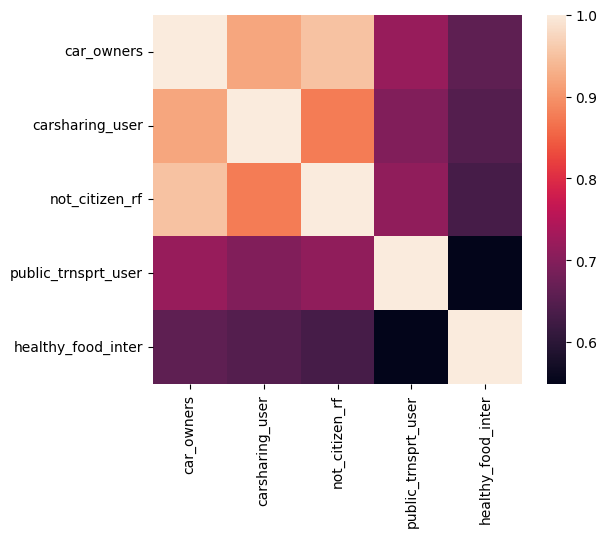

In [ ]:
# Calculate the correlation
df_hex1 = df_hex[['car_owners', 'carsharing_user', 'not_citizen_rf', 'public_trnsprt_user', 'healthy_food_inter']]
cor = df_hex1.corr()
sns.heatmap(cor, square = True)
# The lighter shade represents high correlation.
# We can see that car_owners score is highly correlated with car_sharing_user and not_citizen_rf. It is least correlated with healthy_food_inter.

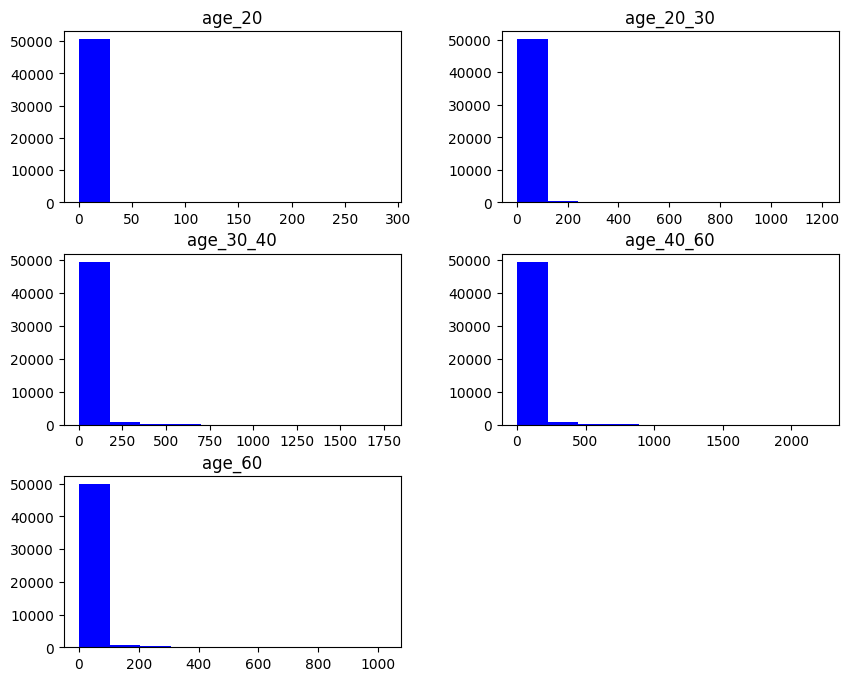

In [ ]:
# Ages distrubution
histograms = df_hex.iloc[:,:6].hist(figsize=(10, 8), color = 'blue', grid = False)

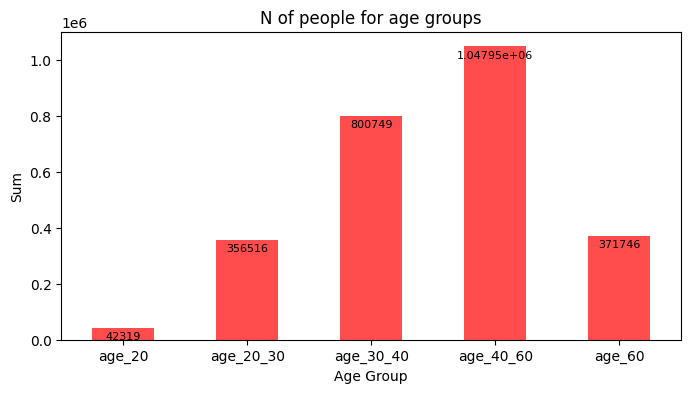

In [ ]:
# N of people for Age Groups
age_columns = ['age_20', 'age_20_30', 'age_30_40', 'age_40_60', 'age_60']

age_sums = df_hex[age_columns].sum()

plt.figure(figsize=(8, 4))
ax = age_sums.plot(kind='bar', color='red', alpha=0.7)
plt.title('N of people for age groups')
plt.xlabel('Age Group')
plt.ylabel('Sum')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='black', rotation=0, fontsize=8, padding=-10)

plt.show()

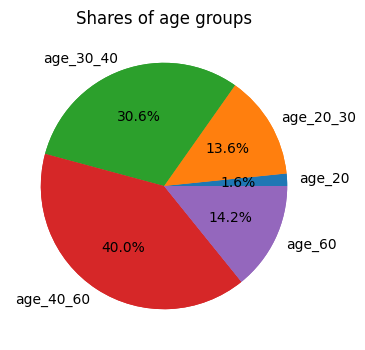

In [ ]:
# Shares of age groups
age_percentages = (df_hex[age_columns].sum() / df_hex[age_columns].sum().sum() * 100).round(2)

plt.figure(figsize=(8, 4))
ax = age_percentages.plot(kind='pie')
plt.title('Shares of age groups')
plt.xticks(rotation=0)
ax.pie(age_percentages, autopct='%1.1f%%')
plt.show()

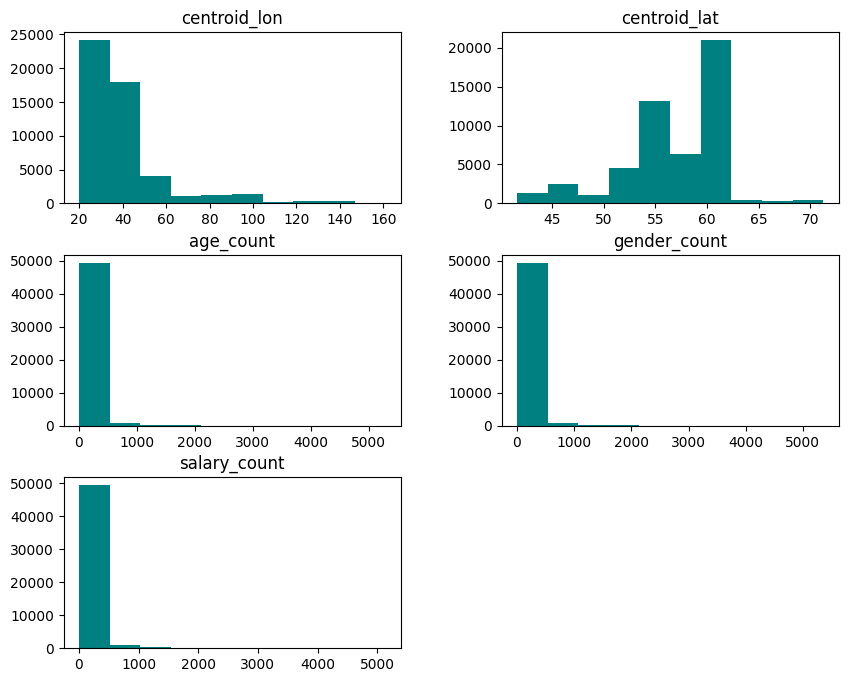

In [ ]:
# Salaries distribution
histograms = df_hex.iloc[:, -5:].hist(figsize=(10,8), color = 'teal', grid = False)

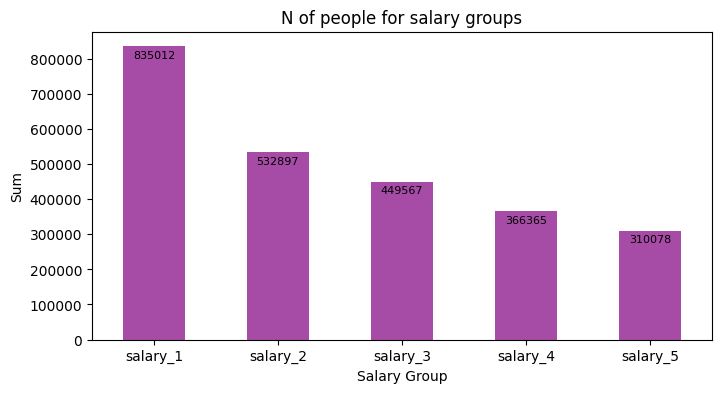

In [ ]:
# N of people for Salary Groups
salary_columns = ['salary_1', 'salary_2', 'salary_3', 'salary_4', 'salary_5' ]

salary_sums = df_hex[salary_columns].sum()

plt.figure(figsize=(8, 4))
ax = salary_sums.plot(kind='bar', color='purple', alpha=0.7)
plt.title('N of people for salary groups')
plt.xlabel('Salary Group')
plt.ylabel('Sum')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='black', rotation=0, fontsize=8, padding=-10)

plt.show()

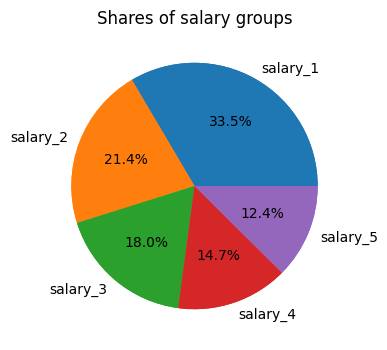

In [ ]:
# Shares of salary groups
salary_percentsalarys = (df_hex[salary_columns].sum() / df_hex[salary_columns].sum().sum() * 100).round(2)

plt.figure(figsize=(8, 4))
ax = salary_percentsalarys.plot(kind='pie')
plt.title('Shares of salary groups')
plt.xticks(rotation=0)
ax.pie(salary_percentsalarys, autopct='%1.1f%%')
plt.show()

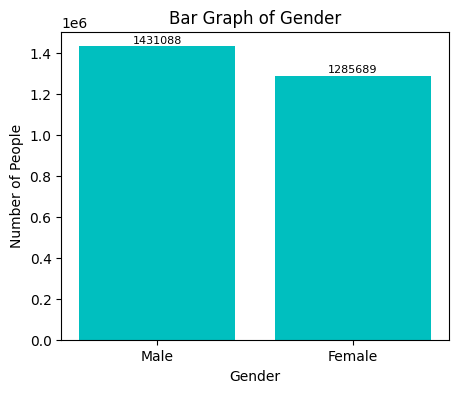

In [ ]:
# Gender distribution
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
males = df_hex['male'].sum()
females = df_hex['female'].sum()

bars = ax.bar(['Male', 'Female'], [males, females], color ='c')

for bar in bars:
   height = bar.get_height()
   ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 1),
   textcoords="offset points", ha='center', va='bottom', fontsize = 8)

plt.title("Bar Graph of Gender")
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.show()

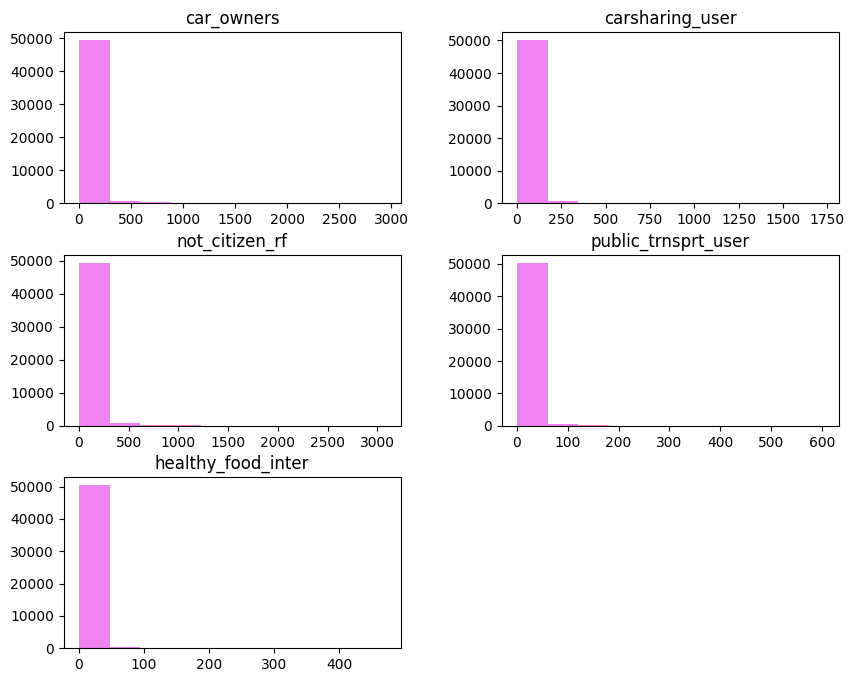

In [ ]:
visualization_columns = df_hex[['car_owners', 'carsharing_user', 'not_citizen_rf', 'public_trnsprt_user', 'healthy_food_inter']]
histograms = visualization_columns.hist(figsize=(10,8), color = 'violet', grid = False)